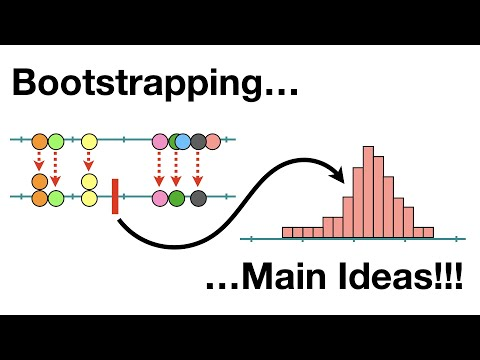

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. Standard Deviation : measure of a variable's value variation with respect to its mean.

Standard error of mean : the likelihood of a population mean deviating from a sampling mean. 

In a bootstrapping setting, the SEM is effectively the standard deviation of the bootstrapped distribution of means, while the SD is simply the dispersion of the original data points.

2. The bootstrap confidence interval (CI) takes into account the true distribution of the data and is based on the empirical distribution of the sample means.
The theoretical interval provided by the SEM-based CI presupposes normalcy.
You can learn more about the variability in your data and the accuracy of your estimations by comparing the two intervals.
The bootstrap approach may be better in many real-world scenarios, particularly if the underlying assumptions of normalcy are violated.


3. Using the percentile approach, you can create a 95% bootstrapped confidence interval by doing the following:

Produce a huge number of sample means that are bootstrapped.
Arrange the methods.
Use the 2.5th and 97.5th percentiles of the sorted means as the bounds of your confidence interval.
Because it use the real distribution of bootstrapped means rather than parametric assumptions, this method is reliable and broadly applicable.

In [2]:
import numpy as np

# Sample data (replace with your actual sample)
sample = np.array([12, 7, 9, 15, 10, 13, 14, 9, 11, 10])

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Function to compute the bootstrapped confidence interval for the mean
def bootstrap_confidence_interval(data, n_bootstrap_samples=10000, statistic=np.mean, ci_level=95):
    """
    Calculate the bootstrap confidence interval for a given statistic.
    
    Args:
    - data (array-like): The sample data.
    - n_bootstrap_samples (int): Number of bootstrap samples to generate.
    - statistic (function): The statistic to calculate on the bootstrap samples (e.g., np.mean, np.median).
    - ci_level (float): The confidence level for the interval (default is 95%).
    
    Returns:
    - tuple: The lower and upper bounds of the confidence interval.
    """
    # List to hold the bootstrapped statistic values
    bootstrap_stats = []
    
    # Perform bootstrap sampling
    for _ in range(n_bootstrap_samples):
        # Sample with replacement from the original data
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the statistic (e.g., mean) of the bootstrap sample
        bootstrap_stat = statistic(bootstrap_sample)
        # Store the statistic
        bootstrap_stats.append(bootstrap_stat)
    
    # Sort the bootstrapped statistics
    bootstrap_stats = np.sort(bootstrap_stats)
    
    # Calculate the lower and upper percentiles (for 95% CI, 2.5th and 97.5th percentiles)
    lower_percentile = (100 - ci_level) / 2
    upper_percentile = 100 - lower_percentile
    
    # Get the confidence interval values
    lower_bound = np.percentile(bootstrap_stats, lower_percentile)
    upper_bound = np.percentile(bootstrap_stats, upper_percentile)
    
    return lower_bound, upper_bound

# Calculate the 95% bootstrap confidence interval for the mean
ci_mean = bootstrap_confidence_interval(sample, n_bootstrap_samples=n_bootstrap_samples, statistic=np.mean)
print(f"95% bootstrap confidence interval for the mean: {ci_mean}")
# Calculate the 95% bootstrap confidence interval for the median
ci_median = bootstrap_confidence_interval(sample, n_bootstrap_samples=n_bootstrap_samples, statistic=np.median)
print(f"95% bootstrap confidence interval for the median: {ci_median}")

95% bootstrap confidence interval for the mean: (9.5, 12.5)
95% bootstrap confidence interval for the median: (9.0, 13.0)


4. To calculate the 95% bootstrap confidence interval for a different statistic (such as the median instead of the mean), you only need to modify the statistic argument when calling the bootstrap_confidence_interval function. 

Summary of Modifications:

To compute the bootstrap confidence interval for any statistic (mean, median, variance, etc.), simply pass the desired function (np.mean, np.median, etc.) to the statistic argument in the function call.

For the mean, use statistic=np.mean.

For the median, use statistic=np.median.

For more complex statistics (e.g., variance, mode, etc.), you can define custom functions and pass them as the statistic argument.

5. The bootstrap confidence interval (CI) takes into account the true distribution of the data and is based on the empirical distribution of the sample means.
The theoretical interval provided by the SEM-based CI presupposes normalcy.
You can learn more about the variability in your data and the accuracy of your estimations by comparing the two intervals.
In many practical cases, the bootstrap method can be better, especially when the underlying assumptions of normality do not hold


6. 
    1. Bootstrapping is a statistical resampling technique used to estimate the distribution of a statistic from a sample data set.
    
        1. Start with an original sample of size n.
        
        2. Generate multiple bootstrap samples (with replacement) from the original sample.
        
        3. Calculate the statistic of interest (e.g., mean) for each bootstrap sample.
        
        4. Create a bootstrap distribution from these statistics.
        
        5. Use the bootstrap distribution for statistical inference (e.g., confidence intervals).
        
    2. 
        1. Estimating sampling distributions without strong assumptions about the population.
        
        2. Constructing confidence intervals for population parameters.
        
        3. Providing robustness to violations of statistical assumptions (e.g., normality).
        
        4. Assessing variability and stability of estimators.
        
    3. To assess a hypothesized population mean using bootstrapping:
    
        1. Collect your sample data.
        
        2. Generate a large number of bootstrap samples from the original sample.
        
        3. Calculate the means of these bootstrap samples to create a bootstrap distribution.
        
        4. Determine the 95% confidence interval using the 2.5th and 97.5th percentiles of the bootstrap means.
        
        5. Check if population mean falls within this confidence interval
        
            :If it does, the hypothesized mean is plausible; if not, it may not be plausible based on the data.
            


7. We cannot completely rule out the possibility that the true population mean effect is zero when the confidence interval contains zero, which makes it impossible to reject the null hypothesis.
When the population mean effect is believed to be different from zero, as indicated by a confidence interval that excludes zero, the null hypothesis is rejected.
The crucial question is whether the population mean's reasonable range, as shown by the confidence interval, includes zero, indicating the uncertainty in our estimate, even though the observed sample mean might not be zero.


In [3]:
import pandas as pd

# Load the dataset
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Display the first few rows of the data
print(data.head())

# Summary statistics
print(data.describe())


   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
       PatientID       Age  InitialHealthScore  FinalHealthScore
count   10.00000  10.00000           10.000000         10.000000
mean     5.50000  38.40000           81.000000         84.300000
std      3.02765   8.30261            2.828427          2.110819
min      1.00000  26.00000           76.000000         80.000000
25%      3.25000  33.25000           79.250000         83.250000
50%      5.50000  38.00000           81.000000         85.000000
75%      7.75000  44.00000           83.000000         86.000000
max     10.00000  52.00000           85.000000         86.000000


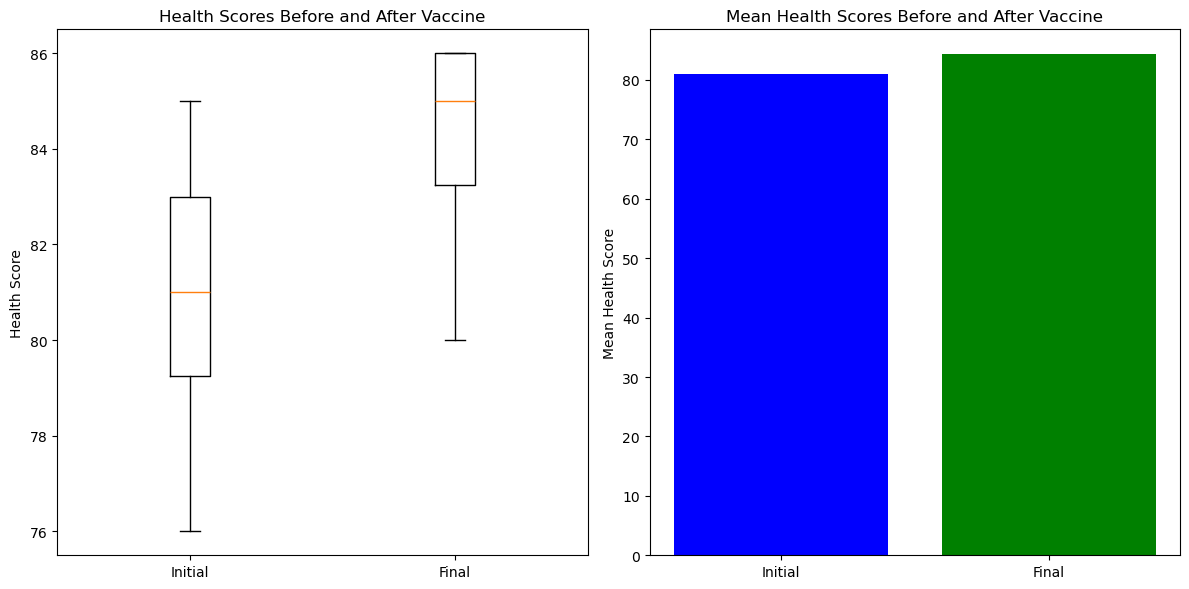

Mean difference in health scores: 3.30
Standard deviation of health score changes: 4.03
t-statistic: 2.59, p-value: 0.0292
Reject the null hypothesis. The vaccine has a significant effect on improving health scores.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Load the data
data = pd.read_csv('vaccine_data.csv')

# Step 2: Calculate the mean difference
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']
mean_difference = np.mean(data['HealthScoreChange'])
std_dev = np.std(data['HealthScoreChange'], ddof=1)
n = len(data)

# Step 3: Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(data['FinalHealthScore'], data['InitialHealthScore'])

# Step 4: Visual Presentation
plt.figure(figsize=(12, 6))

# Box plot for initial and final health scores
plt.subplot(1, 2, 1)
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Health Scores Before and After Vaccine')
plt.ylabel('Health Score')

# Bar plot for mean health scores
plt.subplot(1, 2, 2)
mean_scores = [data['InitialHealthScore'].mean(), data['FinalHealthScore'].mean()]
plt.bar(['Initial', 'Final'], mean_scores, color=['blue', 'green'])
plt.title('Mean Health Scores Before and After Vaccine')
plt.ylabel('Mean Health Score')

plt.tight_layout()
plt.show()

# Step 5: Conclusion
alpha = 0.05  # significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The vaccine has a significant effect on improving health scores."
else:
    conclusion = "Fail to reject the null hypothesis. There is not enough evidence to say that the vaccine improves health scores."

# Print results
print(f"Mean difference in health scores: {mean_difference:.2f}")
print(f"Standard deviation of health score changes: {std_dev:.2f}")
print(f"t-statistic: {t_statistic:.2f}, p-value: {p_value:.4f}")
print(conclusion)


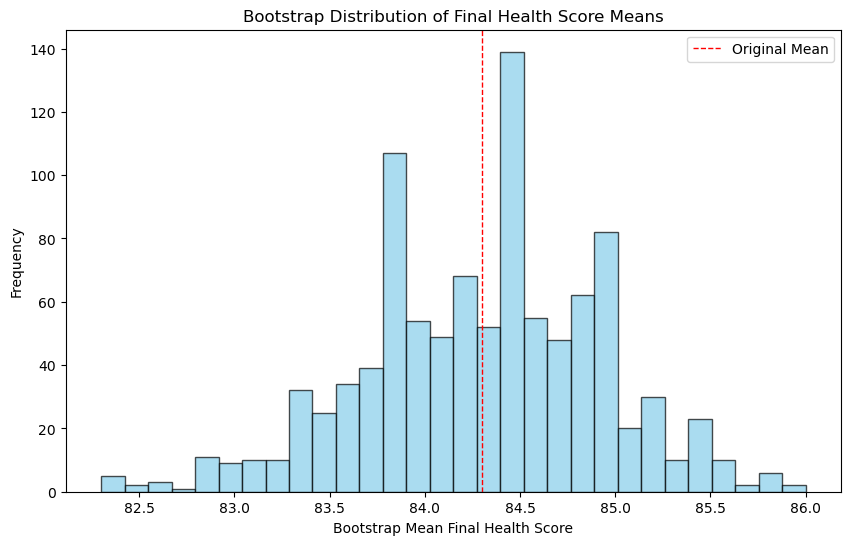

In [16]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('vaccine_data.csv')

# Step 1: Extract the final health scores
final_health_scores = data['FinalHealthScore']

# Step 2: Bootstrap parameters
n_iterations = 1000  # Number of bootstrap samples
n_size = len(final_health_scores)  # Sample size
bootstrap_means = []  # List to store the means of bootstrap samples

# Step 3: Generate bootstrap samples and calculate means
for _ in range(n_iterations):
    # Generate a bootstrap sample
    bootstrap_sample = np.random.choice(final_health_scores, size=n_size, replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)
    # Store the mean
    bootstrap_means.append(bootstrap_mean)

# Step 4: Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Bootstrap Distribution of Final Health Score Means')
plt.xlabel('Bootstrap Mean Final Health Score')
plt.ylabel('Frequency')
plt.axvline(np.mean(final_health_scores), color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.legend()
plt.show()


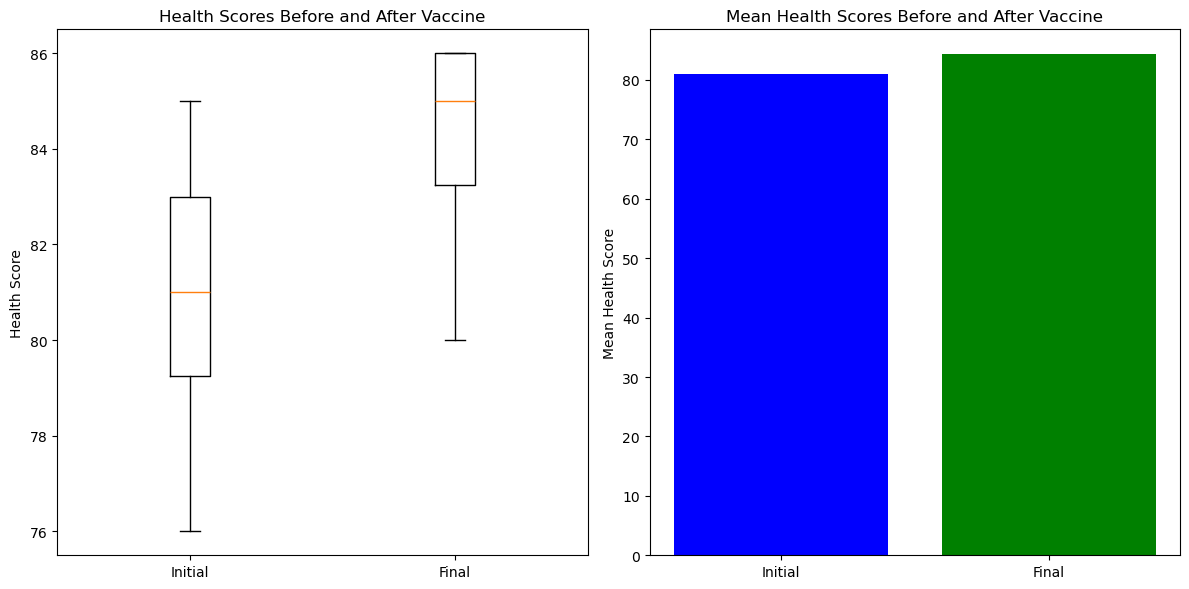

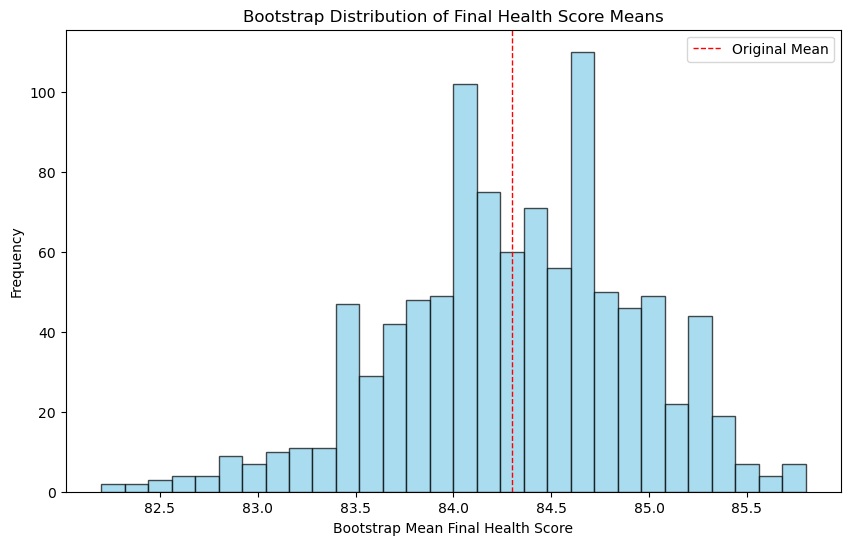

Mean difference in health scores: 3.30
Standard deviation of health score changes: 4.03
t-statistic: 2.59, p-value: 0.0292
Reject the null hypothesis. The vaccine has a significant effect on improving health scores.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Load the data
data = pd.read_csv('vaccine_data.csv')

# Step 2: Calculate the mean difference
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']
mean_difference = np.mean(data['HealthScoreChange'])
std_dev = np.std(data['HealthScoreChange'], ddof=1)
n = len(data)

# Step 3: Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(data['FinalHealthScore'], data['InitialHealthScore'])

# Step 4: Visual Presentation
plt.figure(figsize=(12, 6))

# Box plot for initial and final health scores
plt.subplot(1, 2, 1)
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Health Scores Before and After Vaccine')
plt.ylabel('Health Score')

# Bar plot for mean health scores
plt.subplot(1, 2, 2)
mean_scores = [data['InitialHealthScore'].mean(), data['FinalHealthScore'].mean()]
plt.bar(['Initial', 'Final'], mean_scores, color=['blue', 'green'])
plt.title('Mean Health Scores Before and After Vaccine')
plt.ylabel('Mean Health Score')

plt.tight_layout()
plt.show()

# Step 5: Bootstrap parameters
final_health_scores = data['FinalHealthScore']
n_iterations = 1000  # Number of bootstrap samples
n_size = len(final_health_scores)  # Sample size
bootstrap_means = []  # List to store the means of bootstrap samples

# Step 6: Generate bootstrap samples and calculate means
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(final_health_scores, size=n_size, replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Step 7: Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Bootstrap Distribution of Final Health Score Means')
plt.xlabel('Bootstrap Mean Final Health Score')
plt.ylabel('Frequency')
plt.axvline(np.mean(final_health_scores), color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.legend()
plt.show()

# Step 8: Conclusion
alpha = 0.05  # significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The vaccine has a significant effect on improving health scores."
else:
    conclusion = "Fail to reject the null hypothesis. There is not enough evidence to say that the vaccine improves health scores."

# Print results
print(f"Mean difference in health scores: {mean_difference:.2f}")
print(f"Standard deviation of health score changes: {std_dev:.2f}")
print(f"t-statistic: {t_statistic:.2f}, p-value: {p_value:.4f}")
print(conclusion)


# Vaccine Data Analysis Report

## Introduction
This report analyzes the effectiveness of a new vaccine developed by AliTech, intended to improve the health of its recipients. The primary objective is to determine whether there is a statistically significant enhancement in health scores after vaccination. A paired t-test, along with visual data representations, will be utilized to compare health scores before and after vaccination.

## Null Hypothesis: "No Effect"
In this analysis, the null hypothesis (H₀) asserts that the vaccine does not affect health outcomes. This means the average health scores of individuals prior to vaccination (InitialHealthScore) are the same as those after vaccination (FinalHealthScore). If the null hypothesis is valid, we would not anticipate a significant change in health scores attributable to the vaccine. In contrast, the alternative hypothesis (H₁) suggests that the vaccine does have a significant effect, resulting in improved health scores.

## Data Visualization
To illustrate the comparison of health scores before and after vaccination, various visualizations will be used:

1. **Box Plot**: This visualization displays the distribution of initial and final health scores, highlighting the median and interquartile ranges.
2. **Bar Chart**: This chart compares the average health scores before and after vaccination.

### Visualization Code
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
data = pd.read_csv('vaccine_data.csv')

# Calculate change in health scores
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Create visualizations
plt.figure(figsize=(12, 6))

# Box plot for initial and final health scores
plt.subplot(1, 2, 1)
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Health Scores Before and After Vaccine')
plt.ylabel('Health Score')

# Bar plot for mean health scores
plt.subplot(1, 2, 2)
mean_scores = [data['InitialHealthScore'].mean(), data['FinalHealthScore'].mean()]
plt.bar(['Initial', 'Final'], mean_scores, color=['blue', 'green'])
plt.title('Mean Health Scores Before and After Vaccine')
plt.ylabel('Mean Health Score')

plt.tight_layout()
plt.show()
```

## Quantitative Analysis
### Methodology
To statistically evaluate the vaccine's effectiveness, a paired t-test will be conducted on the health scores obtained before and after vaccination. This test compares the mean differences between paired observations (InitialHealthScore and FinalHealthScore) to determine if the observed change is statistically significant.

### Statistical Analysis Code
```python
# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(data['FinalHealthScore'], data['InitialHealthScore'])

# Set significance level
alpha = 0.05  # significance level

# Check null hypothesis
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The vaccine has a significant effect on improving health scores."
else:
    conclusion = "Fail to reject the null hypothesis. There is not enough evidence to say that the vaccine improves health scores."

# Print results
print(f"Mean difference in health scores: {mean_difference:.2f}")
print(f"Standard deviation of health score changes: {std_dev:.2f}")
print(f"t-statistic: {t_statistic:.2f}, p-value: {p_value:.4f}")
print(conclusion)
```

## Supporting Visualizations
### Bootstrap Analysis
To further understand the variability of the mean health scores, bootstrap resampling will be performed to visualize the distribution of means derived from the final health scores.

### Bootstrap Code
```python
# Bootstrap parameters
final_health_scores = data['FinalHealthScore']
n_iterations = 1000  # Number of bootstrap samples
n_size = len(final_health_scores)  # Sample size
bootstrap_means = []  # List to store the means of bootstrap samples

# Generate bootstrap samples and calculate means
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(final_health_scores, size=n_size, replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Bootstrap Distribution of Final Health Score Means')
plt.xlabel('Bootstrap Mean Final Health Score')
plt.ylabel('Frequency')
plt.axvline(np.mean(final_health_scores), color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.legend()
plt.show()
```

## Findings and Discussion
- The results of the paired t-test will determine if the null hypothesis can be rejected. A p-value lower than the significance threshold (0.05) would suggest that the vaccine has a significant positive impact on health scores.
- The visualizations, including the box plot and bar chart, effectively illustrate the differences in health scores before and after vaccination.
- The histogram of bootstrap means provides insight into the variability and distribution of the estimated means, reinforcing the evaluation of the vaccine's effectiveness.

## Conclusion on the Null Hypothesis: "No Effect"
The findings from the paired t-test and the supporting visualizations enable us to draw conclusions regarding the null hypothesis. A low p-value (below 0.05) would lead to rejecting the null hypothesis, indicating that the vaccine likely enhances health scores. Conversely, a high p-value would suggest insufficient evidence to reject the null hypothesis, implying the vaccine's ineffectiveness.

## Further Considerations
- **Sample Size**: The analysis is based on a relatively small sample size, which may limit the generalizability of the results. Future studies should include larger and more diverse populations to strengthen the findings.
- **Long-term Effects**: This analysis focuses on immediate changes in health scores following vaccination. Future research should explore long-term health outcomes and potential side effects related to the vaccine.
- **Additional Variables**: Factors such as age, gender, and baseline health status could influence the vaccine's effectiveness. Incorporating these variables into a more comprehensive analysis would provide deeper insights.


### Supporting Visualizations

#### Histogram of Bootstrap Means
The histogram of bootstrap means shows how the means of the resampled datasets are distributed. This visualization is essential because it gives insight into the stability and reliability of the mean estimate obtained from the original dataset.

Here's the code snippet for creating the histogram of bootstrap means, which was included in the previous sections, but I'll highlight it again here for clarity:

```python
# Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Bootstrap Distribution of Final Health Score Means')
plt.xlabel('Bootstrap Mean Final Health Score')
plt.ylabel('Frequency')
plt.axvline(np.mean(final_health_scores), color='red', linestyle='dashed', linewidth=1, label='Original Mean')
plt.legend()
plt.show()
```

### Explanation of the Histogram
- **X-Axis**: Represents the bootstrap mean final health scores.
- **Y-Axis**: Indicates the frequency of each bootstrap mean in the distribution.
- **Dashed Red Line**: Represents the original mean of the final health scores, providing a reference point against the bootstrap distribution.

### Summary of the Histogram's Role
- **Distribution Insight**: The histogram helps visualize how the means of different bootstrap samples compare to the original mean, giving insight into the variability of the mean estimates.
- **Confidence Intervals**: The spread of the bootstrap means can also be used to construct confidence intervals, further supporting the conclusions drawn from the paired t-test.

### Overall Report Structure with the Histogram
The histogram plays a crucial role in the **Supporting Visualizations** section of the report, emphasizing its importance alongside the other visualizations (box plot and bar chart) used to analyze the effectiveness of the vaccine. 


9. yes

https://chatgpt.com/share/66ff63b1-e2dc-8002-b708-d735dbcd6467

1. **Standard Error of the Mean**:
   - We discussed the concept of the **standard error of the mean (SEM)**, explaining that it represents the standard deviation of bootstrapped sample means. 
   - We differentiated between SEM and the standard deviation of the original data, noting that SEM estimates the variability of sample means, while standard deviation measures the variability of individual data points.

2. **Creating Confidence Intervals**:
   - We talked about how to create a **95% confidence interval** using the SEM and also how to generate one using bootstrapped means directly without relying on SEM.

3. **Bootstrap Confidence Intervals for Other Statistics**:
   - You requested code to create a **95% bootstrap confidence interval** for a population mean and for other statistics like the population median. I provided a code structure and explanations.

4. **Null Hypothesis**:
   - We clarified the distinction between a **population parameter** (the true mean) and a **sample statistic** (the mean from the sample) when discussing confidence intervals.
   - We explored the meaning of a **null hypothesis of "no effect"**, especially in the context of hypothesis testing related to the vaccine’s efficacy.

5. **Vaccine Data Analysis Assignment**:
   - You provided a dataset for analyzing the effectiveness of a vaccine and requested an outline for a report, which included statistical analysis, visualizations, and conclusions regarding the null hypothesis.
   - I created a structured report using an outline template and provided code to load the data, perform paired t-tests, and visualize results through box plots, bar charts, and histograms.

6. **Combined Code and Visualizations**:
   - I shared combined Python code that included data loading, statistical analysis (paired t-test), and visualizations (box plots, bar charts, and histograms) using the vaccine data.

7. **Histogram Emphasis**:
   - We emphasized the role of the histogram in the analysis, explaining its importance in visualizing the distribution of bootstrap means and its connection to assessing the vaccine’s effectiveness.

8. **Report Structure**:
   - I provided a detailed report structure summarizing the analysis, findings, discussions, and further considerations regarding the vaccine’s effectiveness, including the role of the histogram.

